In [53]:
import networkx as nx
import dynetx as dn
import ndlib.models.ModelConfig as mc
import ndlib.models.dynamic as dm
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

In [54]:
# Dynamic Network topology
dg = dn.DynGraph()

In [55]:
g = nx.barabasi_albert_graph(5000, 25)

In [56]:
dg.add_interactions_from(g.edges(), t=0, e=500)

In [57]:
print(nx.info(dg))

Name: 
Type: DynGraph
Number of nodes: 5000
Number of edges: 124375
Average degree:  49.7500


In [59]:
model = dm.DynSIRModel(dg)
config = mc.Configuration()
config.add_model_parameter("fraction_infected", 0.05)
config.add_model_parameter("beta", 0.001)
config.add_model_parameter("gamma", 0.01)
model.set_initial_status(config)

In [60]:
# Simulate snapshot based execution
iterations = model.execute_snapshots()

In [61]:
trends = model.build_trends(iterations)

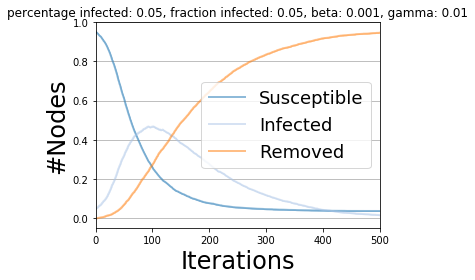

In [62]:
DiffusionTrend(model, trends).plot()

### composite model-lel

In [ ]:
def dynamic_diffusion(dg, iterations=100):

    dc_model = dgc.DynamicCompositeModel(dg)

    for cat in ["Susceptible", "Infected", "Removed"]:
        dc_model.add_status(cat)

    c1 = ns(0.02, triggering_status="Infected")
    c2 = ns(0.01)

    dc_model.add_rule("Susceptible", "Infected", c1)
    dc_model.add_rule("Infected", "Removed", c2)

    config = mc.Configuration()
    config.add_model_parameter('fraction_infected', 0.1)

    dc_model.set_initial_status(config)
    dc_trends = dc_model.build_trends(dc_model.iteration_bunch(iterations))
    
    return dc_model, dc_trends

In [ ]:
m, t = dynamic_diffusion(dg, iterations=500)